# Data-X Spring 2019: Homework 05

### Linear regression & Logistic regression



## Name:Jack Xie

## SID: 3032163590




In this homework, you will do some exercises on prediction using sklearn. 

REMEMBER TO DISPLAY ALL OUTPUTS. If the question asks you to do something, make sure to print your results.


## Part 1 - Regression


### Data:
__Data Source__:
Data file is uploaded to bCourses and is named: __Energy.csv__ 
(Link in the Assignment details page on Bcourses) 

The dataset was created by Angeliki Xifara ( Civil/Structural Engineer) and was processed by Athanasios Tsanas, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

__Data Description__:

The dataset contains eight attributes of a building (or features, denoted by X1...X8) and response being the heating load on the building, y1. 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
*  X4	Roof Area 
*  X5	Overall Height 
* X6	Orientation 
*  X7	Glazing Area 
*  X8	Glazing Area Distribution 
*  y1	Heating Load 


#### Q1.1
Read the data file from the csv.

Print the count of NaN values for each attribute in the dataset.

Print the Range (min, max) and percentiles (25th, 50th, and 75th) of each attribute in the dataset

In [560]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [410]:
df = pd.read_csv('Energy.csv')

In [411]:
df= shuffle(df).reset_index(drop=True)

In [390]:
df[df.isnull()==True].count()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
dtype: int64

In [391]:
df.describe().drop(['count','mean','std'])

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
min,0.6200,514.500,245.0,110.250,3.50,2.00,0.00,0.00,6.0100
25%,0.6825,606.375,294.0,140.875,3.50,2.75,0.10,1.75,12.9925
50%,0.7500,673.750,318.5,183.750,5.25,3.50,0.25,3.00,18.9500
75%,0.8300,741.125,343.0,220.500,7.00,4.25,0.40,4.00,31.6675
max,0.9800,808.500,416.5,220.500,7.00,5.00,0.40,5.00,43.1000


 __REGRESSION__:

Using the data, we want to predict "Heating load". The output variable is continuous. Hence, we need to use a regression algorithm.  

__Q 1.2:__ 

Split the dataset randomly into train and test. Train a **Linear Regression** model on 80% of the data (80-20 split).
What is the intercept and coefficient values?



In [392]:
X=df.iloc[:,:-1]
Y=df['Y1']

In [393]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [394]:
from sklearn import linear_model
LinearRegressionModel = linear_model.LinearRegression()
LinearRegressionModel.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [395]:
LinearRegressionModel.intercept_

81.11764681929523

In [396]:
LinearRegressionModel.coef_

array([-6.46058188e+01, -5.99462098e-02,  3.43033160e-02, -4.71247628e-02,
        4.35455621e+00, -4.34832796e-03,  1.95275235e+01,  2.90736413e-01])


#### Q.1.3: 

Create a function which takes arrays of prediction and actual values of the output as parameters to calculate **'Root Mean Square error'** (RMSE) metric:  

1. Use the function to calculate the training RMSE  
2. Use the function to calculate the test RMSE



In [397]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(actual, pred):
    return sqrt(mean_squared_error(actual, pred))

In [398]:
rmse(y_train, LinearRegressionModel.predict(x_train))

2.9228304645098064

In [399]:
rmse(y_test, LinearRegressionModel.predict(x_test))

2.9249096398738486


#### Q1.4: 

Let's see the effect of amount of data on the performance of prediction model. Use varying amounts of data (100,200,300,400,500,all) from the training data you used previously to train different regression models. Report  training error and test error in each case. Test data  is the same as above for  all  these cases.

**Plot error rates vs number of training examples.** Both the training error and the test error should be plotted. Comment on the relationship you observe between the amount of data used to train the model and the test accuracy of the model.

__Hint:__ Use array indexing to choose varying data amounts

In [400]:
data = [100, 200, 300, 400, 500, len(df)]
train, test = [], []
for i in data:
    X=df.iloc[:i,:-1]
    Y=df.iloc[:i,-1]
    x_train, x_test, y1, y2 = train_test_split(X, Y, test_size=0.2, random_state=100)
    LinearRegressionModel = linear_model.LinearRegression()
    LinearRegressionModel.fit(x_train, y1)
    train.append(rmse(y1, LinearRegressionModel.predict(x_train)))
    test.append(rmse(y2, LinearRegressionModel.predict(x_test)))

In [401]:
train

[2.898217670293583,
 3.025358875090744,
 2.841505812583586,
 2.9513047071415133,
 2.851810910830902,
 2.9228304645098064]

In [402]:
test

[3.51872979356839,
 3.1901636551705095,
 2.9052394394691343,
 2.7214783660531587,
 2.909827606308973,
 2.9249096398738486]

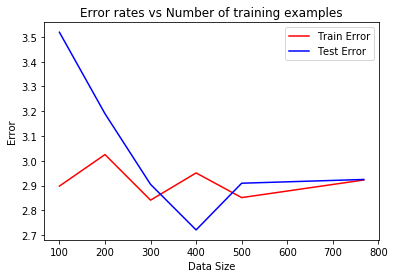

In [403]:
plt.plot(data, train, 'r-', label='Train Error')
plt.plot(data, test, 'b-', label='Test Error')
plt.legend()
plt.xlabel('Data Size')
plt.ylabel('Error')
plt.title('Error rates vs Number of training examples')
plt.show()

As the amount of data that used to build the model increases, both Train error and test error decrease.

## Part 2 - Classification


__CLASSIFICATION__:
LABELS ARE DISCRETE VALUES.

Here the model is trained to classify each instance into a set of predefined discrete classes. On inputting a feature vector into the model, the trained model is able to predict a class of that instance.


#### Q2.1
Bucket the values of 'y1' i.e 'Heating Load'  from the original dataset into 3 classes:

0: 'Low' ( < 14),   
1: 'Medium'  (14-28),   
2: 'High'  (>28)

**HINT:** Use pandas.cut

This converts the given dataset  into a classification problem. Use this dataset with transformed 'heating load' to create a **logistic regression** classifiction model that predicts heating load type of a building. Split the data randomly into training and test set. Train the model on 80% of the data (80-20 split).



In [321]:
df = shuffle(df)

In [442]:
Y = pd.cut(df['Y1'], [6, 14, 28, 45], labels=[0, 1, 2])
X = df.iloc[:,:-1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)


In [561]:
LogisticRegressionModel = linear_model.LogisticRegression()
LogisticRegressionModel.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Q2.2 
- Print the training and test accuracies
- Print the confusion matrix
- Print the precision and recall numbers for all the classes


In [444]:
train_accuracy=LogisticRegressionModel.score(x_train,y_train)
print('Accuracy of the model on train data: ',train_accuracy)

Accuracy of the model on train data:  0.8061889250814332


In [445]:
test_accuracy=LogisticRegressionModel.score(x_test,y_test)
print('Accuracy of the model on test data: ',test_accuracy)

Accuracy of the model on test data:  0.7337662337662337


In [446]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = LogisticRegressionModel.predict(x_test)
ConfusionMatrix=pd.DataFrame(confusion_matrix(y_true, y_pred),columns=['Predicted 0','Predicted 1','Predicted 2'],index=['Actual 0','Actual 1','Actual 2'])
print ('Confusion matrix of test data is: \n',ConfusionMatrix)

Confusion matrix of test data is: 
           Predicted 0  Predicted 1  Predicted 2
Actual 0           38            2            0
Actual 1           11           25           28
Actual 2            0            0           50


In [447]:
from sklearn.metrics import precision_score
print("Average precision for the 3 classes is - ", precision_score(y_true, y_pred, average = None) )

Average precision for the 3 classes is -  [0.7755102  0.92592593 0.64102564]


In [448]:
from sklearn.metrics import recall_score
print("Average recall for the 3 classes is - ", recall_score(y_true, y_pred, average = None) )

Average recall for the 3 classes is -  [0.95     0.390625 1.      ]


#### Q2.3
##### K Fold Cross Validation

 In k-fold cross-validation, the shuffled training data is partitioned into k disjoint sets and the model is trained on k −1 sets and validated on the kth set. This process is repeated k times with each set chosen as the validation set once. The cross-validation accuracy is reported as the average accuracy of the k iterations
 
__Use 7-fold cross validation on the training data. Print the average accuracy__

In [562]:
from sklearn.model_selection import KFold
accuracy = []
X=np.array(df.iloc[:,:-1])
Y=np.array(pd.cut(df['Y1'], [6, 14, 28, 45], labels=[0, 1, 2]))
kf = KFold(n_splits=7, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    LogisticRegressionModel = linear_model.LogisticRegression()
    LogisticRegressionModel.fit(X_train, Y_train)
    accuracy.append(LogisticRegressionModel.score(X_train,Y_train))

In [543]:
accuracy

[0.7963525835866262,
 0.8115501519756839,
 0.8069908814589666,
 0.7978723404255319,
 0.8069908814589666,
 0.8012139605462822,
 0.8088012139605463]

In [544]:
np.mean(accuracy)

0.8042531447732292

__Q2.4__

One of the preprocessing steps in Data science is Feature Scaling i.e getting all our data on the same scale by setting same  Min-Max of feature values. 
This makes training less sensitive to the scale of features . 
Scaling is important in algorithms that use distance functions as a part of classification. If we Scale features in the range [0,1] it is called unity based normalization.

__Perform unity based normalization on the above dataset and train the model again, compare model performance in training and validation with your previous model.__  

refer:http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler  
more at: https://en.wikipedia.org/wiki/Feature_scaling

In [545]:
from sklearn import preprocessing

In [550]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

In [551]:
X=np.array(df.iloc[:,:-1])
Y=np.array(pd.cut(df['Y1'], [6, 14, 28, 45], labels=[0, 1, 2]))
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [563]:
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_test_minmax = min_max_scaler.transform(x_test)
LogisticRegressionModel = linear_model.LogisticRegression()
LogisticRegressionModel.fit(x_train_minmax, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [553]:
LogisticRegressionModel.score(x_train_minmax,y_train)

0.8208469055374593

After shuffle the data at least 10 time for both 2.3 and 2.4, The performance for unity based normalization is generally 0.02 better than 7-fold cross validation on this particular data set. 